In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [3]:
df = pd.read_csv('Heart.csv')

In [ ]:
df[:5]

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df['ChestPain'].value_counts()

asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: ChestPain, dtype: int64

In [ ]:
df['ChestPain'] = df['ChestPain'].astype('category')

In [ ]:
df['ChestPain'] = df['ChestPain'].cat.codes

In [ ]:
df[:5]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
df['Thal'].value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

In [ ]:
df['Thal'] = df['Thal'].astype('category')

In [ ]:
df['Thal'] = df['Thal'].cat.codes

In [ ]:
df[:5]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,No
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,Yes
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,Yes
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,No
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,No


In [ ]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         0
AHD          0
dtype: int64

In [ ]:
df['AHD'] = df['AHD'].astype('category')
df['AHD'] = df['AHD'].cat.codes

In [ ]:
df[:5]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


In [ ]:
df.shape

(303, 14)

In [ ]:
mean_Ca = np.mean(df['Ca'])

In [ ]:
df['Ca'] = df['Ca'].replace(np.nan, mean_Ca)

In [ ]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [ ]:
df.shape

(303, 14)

In [ ]:
X, y = df.drop(columns= 'AHD'), df['AHD']

In [ ]:
X[0:3]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2


In [ ]:
y[:10]

0    0
1    1
2    1
3    0
4    0
5    0
6    1
7    0
8    1
9    1
Name: AHD, dtype: int8

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 21)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test =  scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LOR =LogisticRegression(random_state=0)

In [ ]:
LOR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_train_pred = LOR.predict(X_train)
y_train_pred[:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int8)

In [ ]:
Accuracy = LOR.score(X_train, y_train)
Accuracy

0.8584905660377359

85% accuracy on the train data that the model is familiar with

In [ ]:
Accuracy = LOR.score(X_test, y_test)
Accuracy

0.8131868131868132

81% prediction accuracy on data that the model is not familiar with

In [ ]:
yhat_test = LOR.predict(X_test)
yhat_test

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0], dtype=int8)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_test, yhat_test)

0.8131868131868132

In [ ]:
LOR_2 = LogisticRegression(random_state=0, C=1, fit_intercept = True).fit(X_train, y_train)

In [ ]:
Accuracy = LOR_2.score(X_train, y_train)
Accuracy

0.8584905660377359

In [ ]:
Accuracy = LOR_2.score(X_test, y_test)
Accuracy

0.8131868131868132

/tmp/ipykernel_345/1970163724.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1= sns.distplot(y, hist = False, color = 'r', label = "Actual Value")
/tmp/ipykernel_345/1970163724.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(yhat, hist = False, color = 'b',label = "Predicted

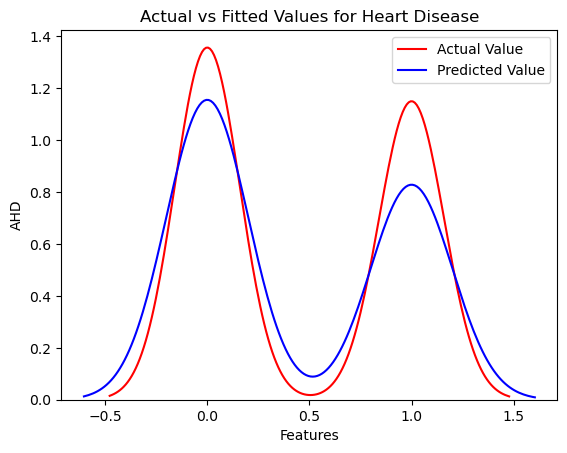

In [ ]:
ax1= sns.distplot(y, hist = False, color = 'r', label = "Actual Value")
ax = sns.distplot(yhat, hist = False, color = 'b',label = "Predicted Value", ax = ax1)
plt.title('Actual vs Fitted Values for Heart Disease')
plt.xlabel('Features')
plt.ylabel('AHD')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

## Author
[Jolayemi Babatunde](linkedin.com/in/babatunde-jolayemi-a05312275)